### Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

### Target

Churn column is our target column, we have to predict whether the customer leave or not

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

It has 7043 rows & 21 rows

In [4]:
df.head()  #first five rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()  #last five rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.columns  #columns present in the dataset

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()  #a small brief info about the each column of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.nunique()  #checking the unique values of each column

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Checking the null values

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

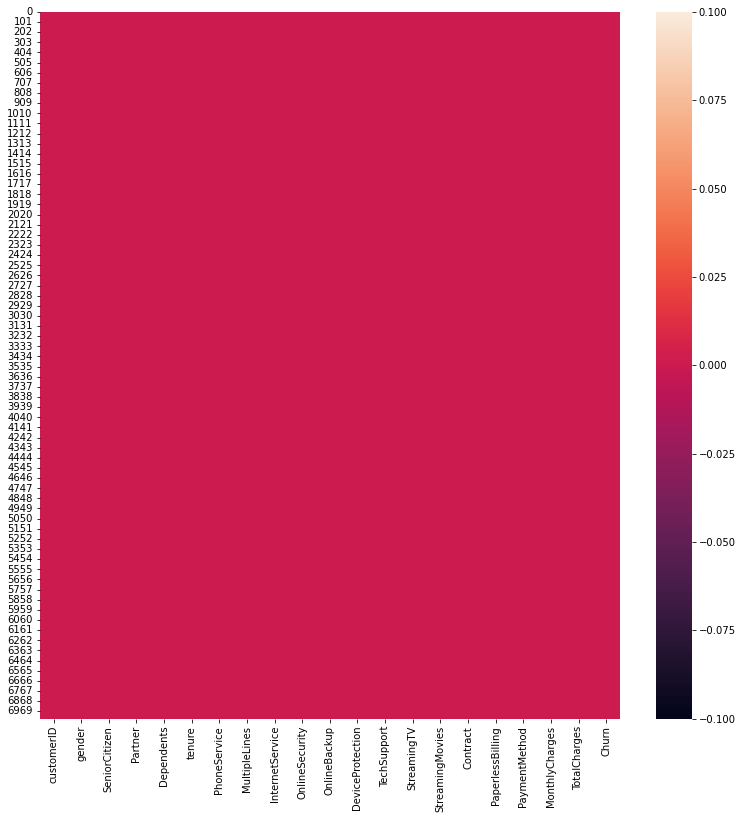

In [10]:
plt.figure(figsize=(13,13))  #plotting the null values using heatmap
sns.heatmap(df.isnull())

There are some blank spaces in the total charges column so we have to handle this

In [12]:
df.isin([" "]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

####  replacing blank space with nan

In [13]:
df.replace({" ":np.nan},inplace=True)

In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
df['TotalCharges']=df['TotalCharges'].astype(float)  #chanfing the datatype of the column from object to float

In [20]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Handling the null value

In [21]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [22]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Univariate Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

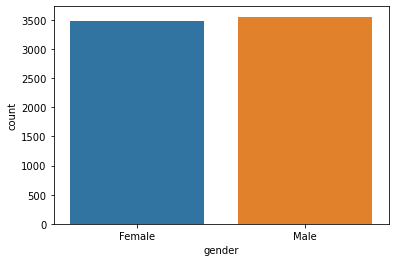

In [24]:
sns.countplot(df['gender'])

Equal no of males & females are present in the dataset

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

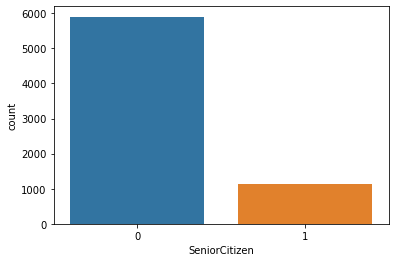

In [25]:
sns.countplot(df['SeniorCitizen'])

Very less no of people are senior citizen

<AxesSubplot:xlabel='Partner', ylabel='count'>

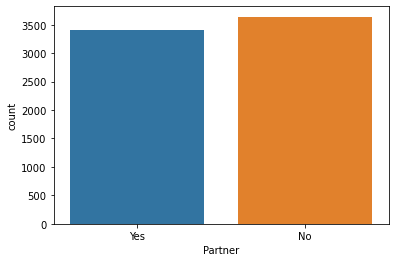

In [26]:
sns.countplot(df['Partner'])

almost equal no of peoples are married

<AxesSubplot:xlabel='Dependents', ylabel='count'>

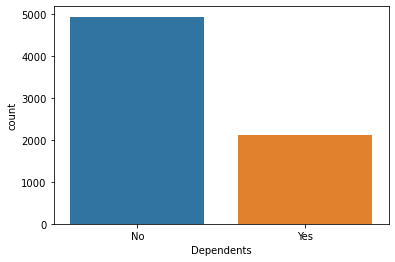

In [27]:
sns.countplot(df['Dependents'])

less no of people are dependents

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

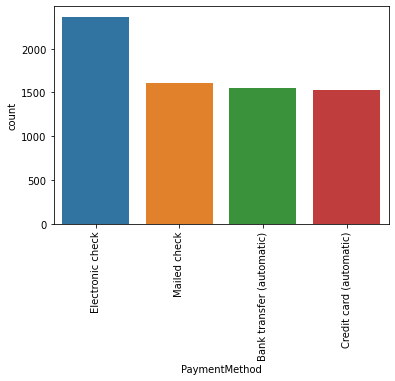

In [29]:
sns.countplot(df['PaymentMethod'])
plt.xticks(rotation=90)

Mostly uses the electronic check for the payment

<AxesSubplot:xlabel='InternetService', ylabel='count'>

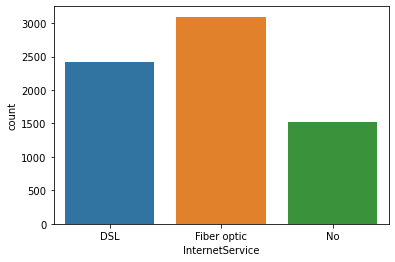

In [30]:
sns.countplot(df['InternetService'])

Mostly uses the fibre optic service followed by DSL

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

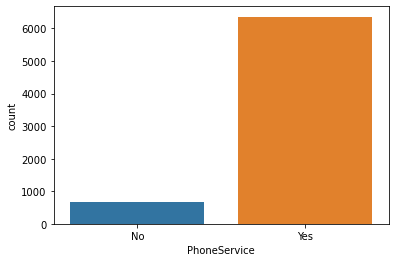

In [31]:
sns.countplot(df['PhoneService'])

A very less no of people are there who are no using the phone service

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

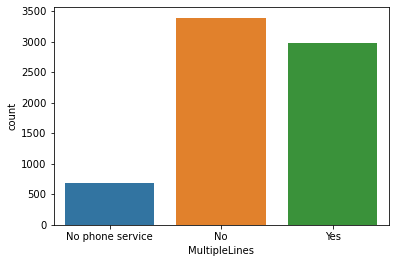

In [32]:
sns.countplot(df['MultipleLines'])

Most of the peoples doesn't have the multiple lines

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

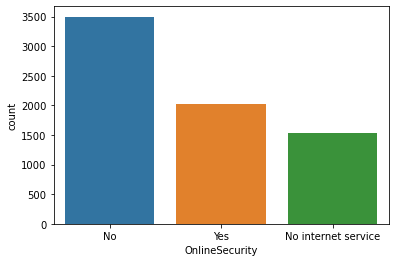

In [33]:
sns.countplot(df['OnlineSecurity'])

there has been less people who have the online security

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

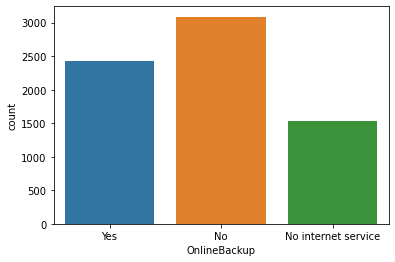

In [34]:
sns.countplot(df['OnlineBackup'])

Peoples also go for the online backup, there are peoples who have no internet service

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

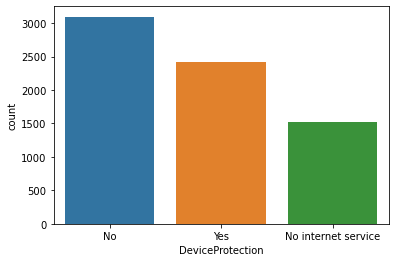

In [35]:
sns.countplot(df['DeviceProtection'])

there are peoples have their device protection as well

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

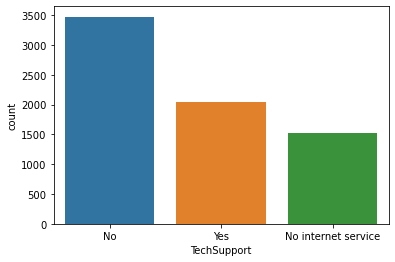

In [36]:
sns.countplot(df['TechSupport'])

most of the people doesn't have the techsupport from the company

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

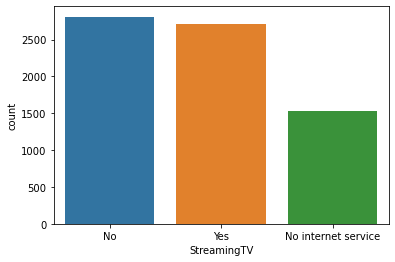

In [37]:
sns.countplot(df['StreamingTV'])

almost equal no of peoples who are or not streaming their tvs through the provider 

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

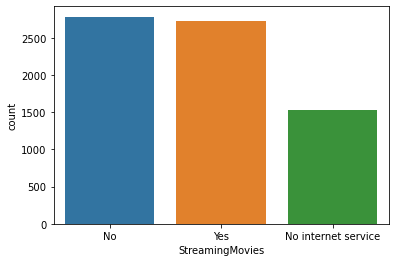

In [38]:
sns.countplot(df['StreamingMovies'])

equal no of peoples are there who are or not streaming movies 

<AxesSubplot:xlabel='Contract', ylabel='count'>

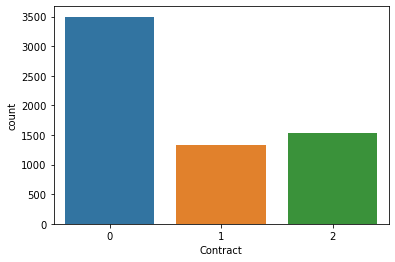

In [96]:
sns.countplot(df['Contract'])

most of the people go for month-to-month contract with the service provider

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

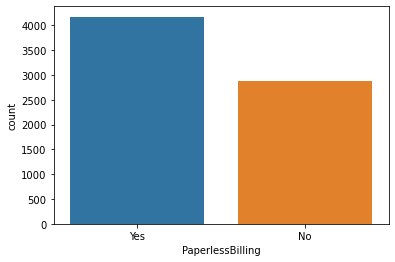

In [40]:
sns.countplot(df['PaperlessBilling'])

Most of the peoples chose the paperless billing

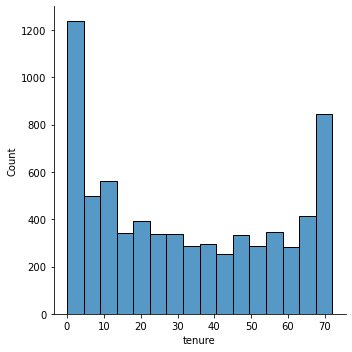

In [53]:
sns.displot(df['tenure'])

Either we have a peak on lower side or on the hiher side i.e people chose the service provider for less period of time or more period of time

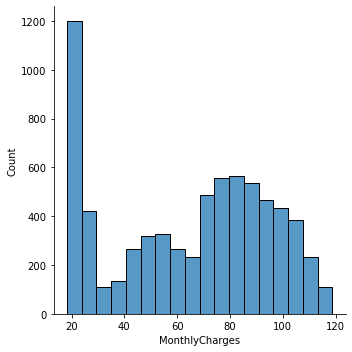

In [42]:
sns.displot(df['MonthlyCharges'])

most of the monthly charges are on the lower side 

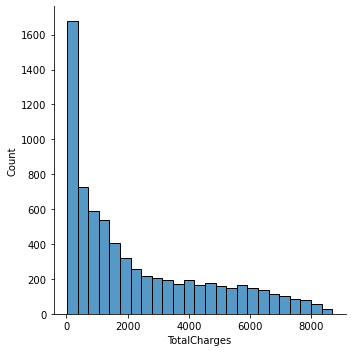

In [43]:
sns.displot(df['TotalCharges'])

there is a sharp decrease in the total charges

<AxesSubplot:xlabel='SeniorCitizen', ylabel='tenure'>

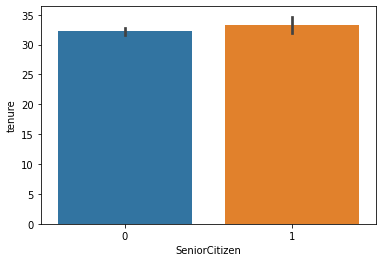

In [44]:
sns.barplot(df['SeniorCitizen'],df['tenure'])

senior citizen have a larger tenure

<AxesSubplot:xlabel='Churn', ylabel='count'>

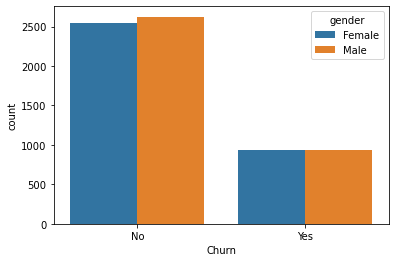

In [45]:
sns.countplot(df['Churn'],hue=df['gender'])

equal no of males & females are there who can churn hte provider

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

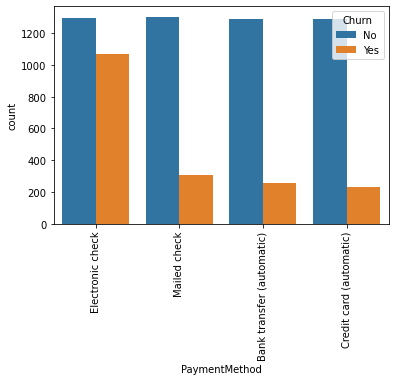

In [47]:
sns.countplot(df['PaymentMethod'],hue=df['Churn'])
plt.xticks(rotation=90)

equal percentage of no churning in any payment method but there is a higher number of churning in electronic check method

<AxesSubplot:xlabel='Partner', ylabel='count'>

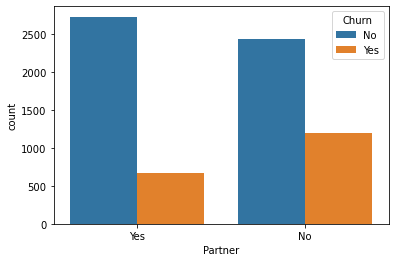

In [49]:
sns.countplot(df['Partner'],hue=df['Churn'])

marriage doesn't affect that much the churning 

#### Multivariate analysis

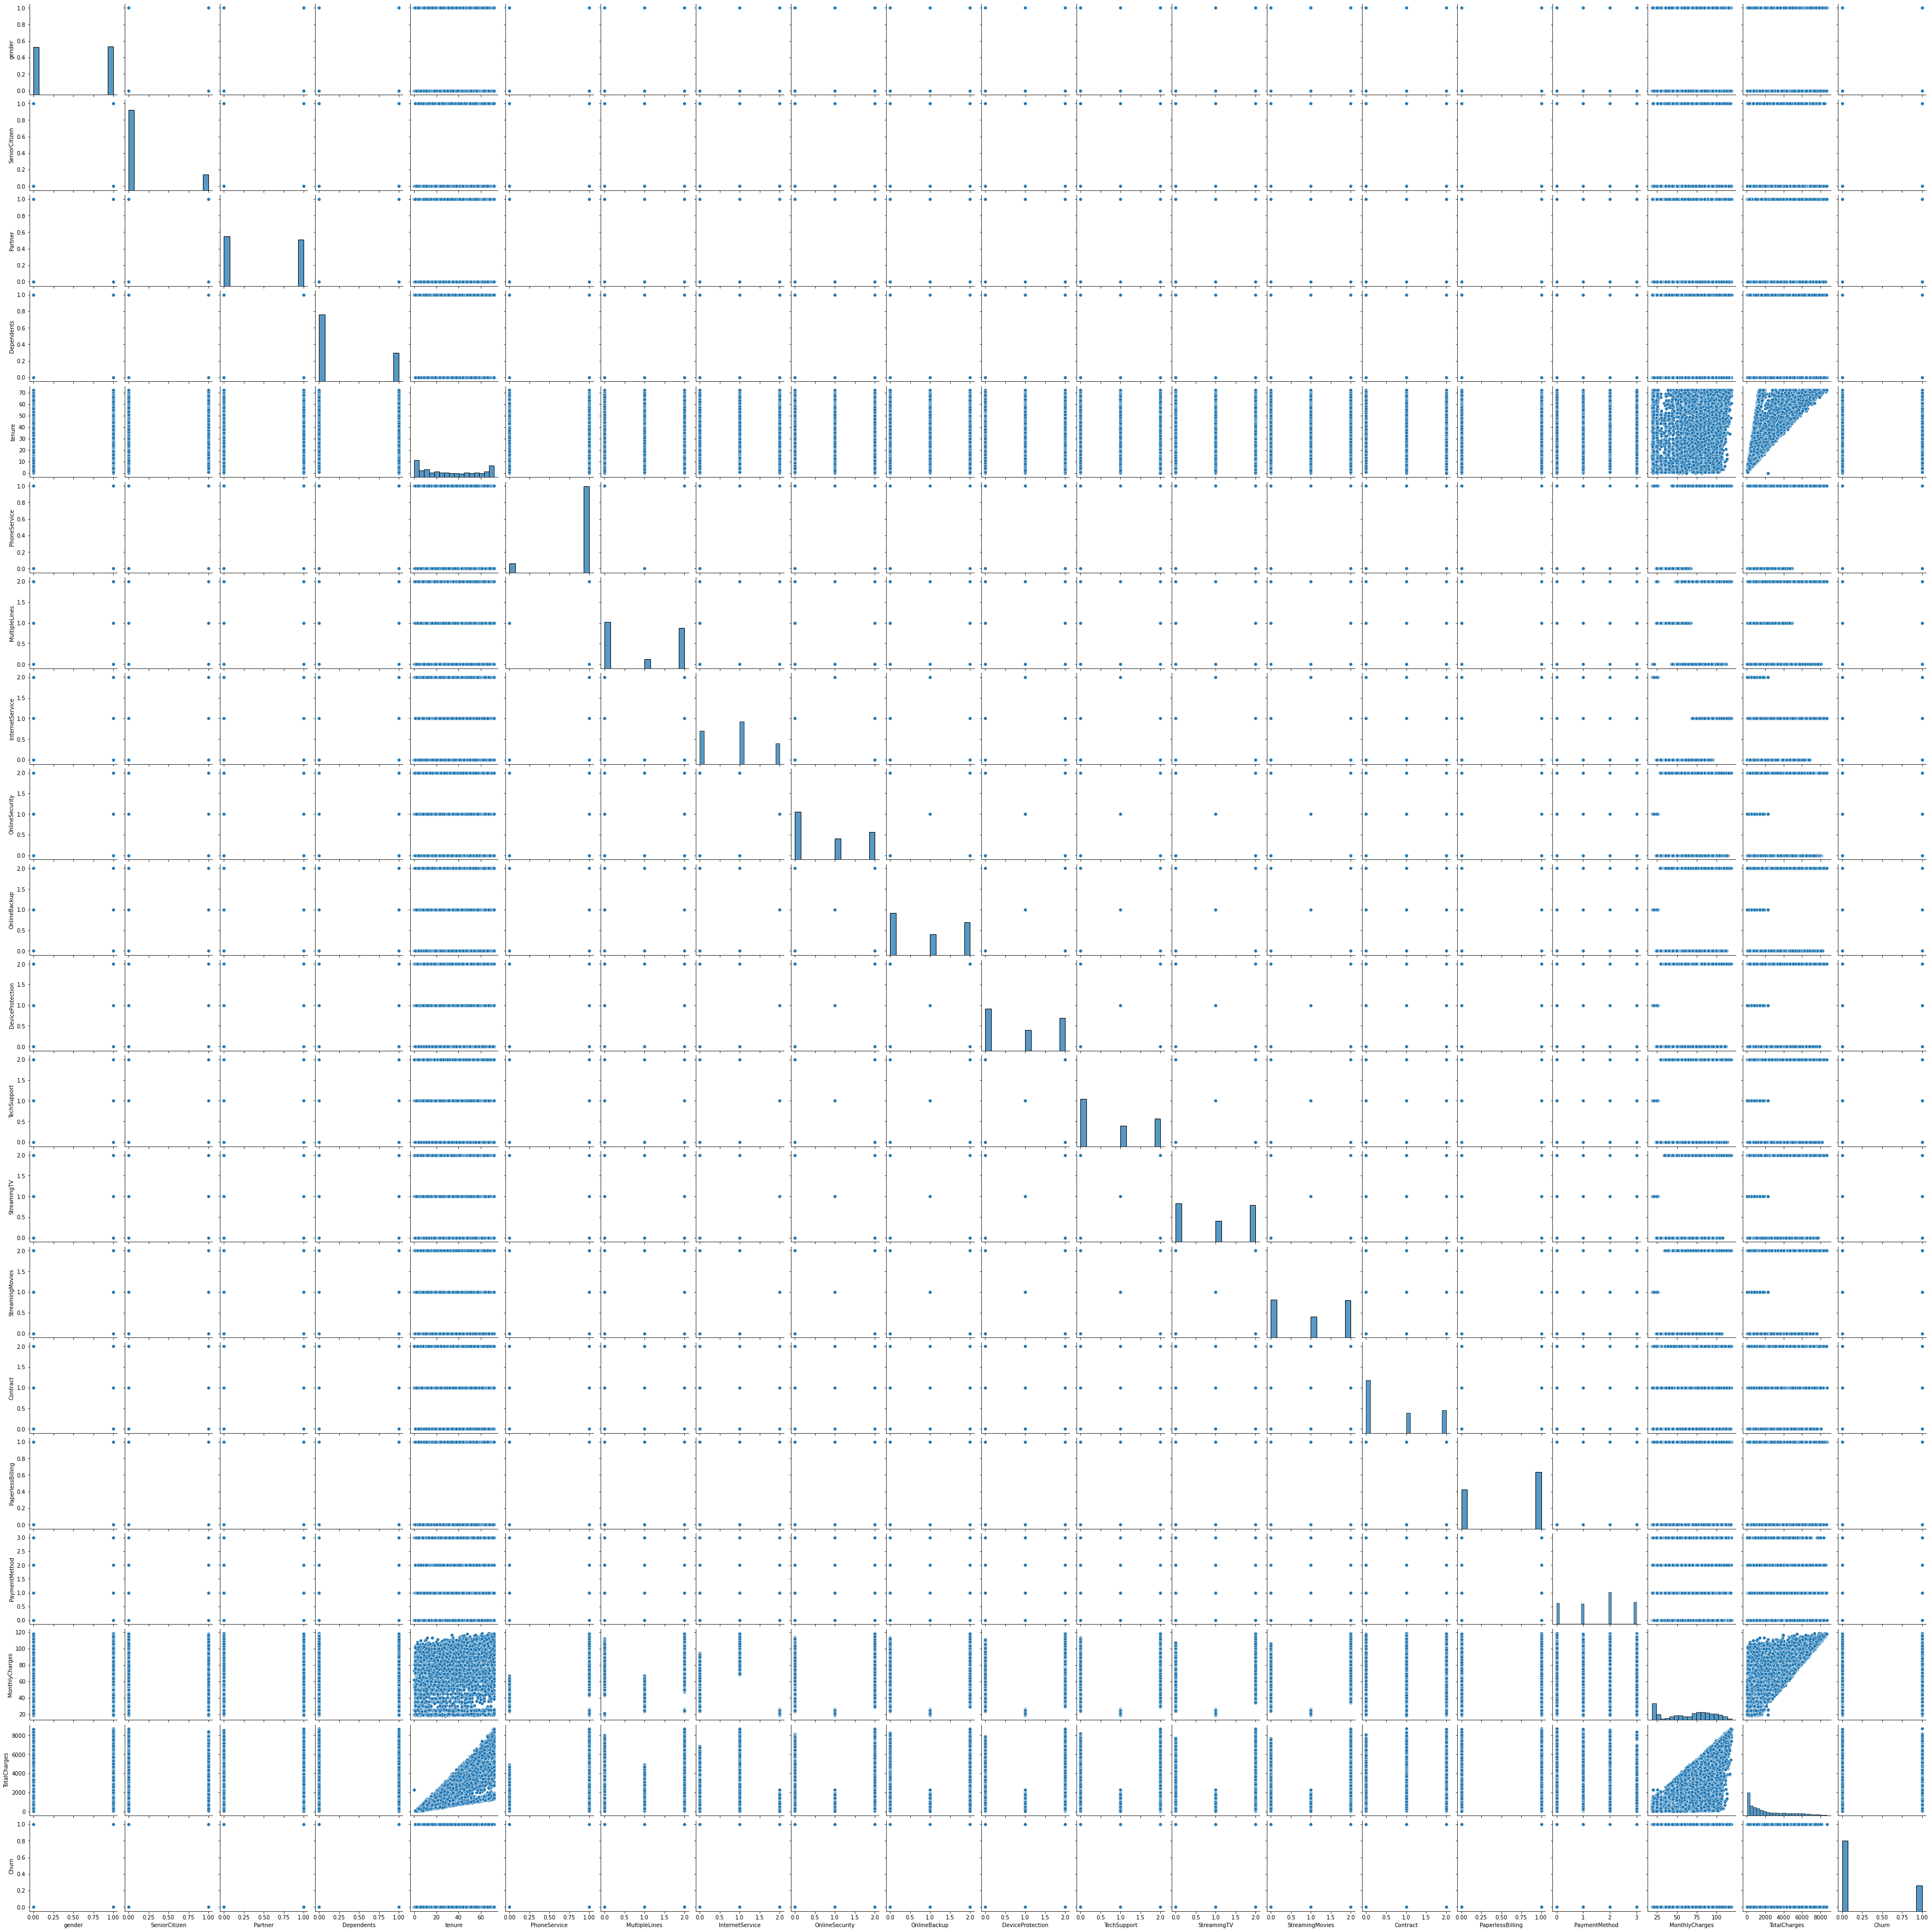

In [62]:
sns.pairplot(df)

### Label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].astype(str))

In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [55]:
df.drop('customerID',axis=1,inplace=True)  #dropping customer id column

### Statistical Summary

In [56]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


- total counts is 7043
- very less outliers 
- very less skewness

### Correlation

In [58]:
corr=df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


<AxesSubplot:>

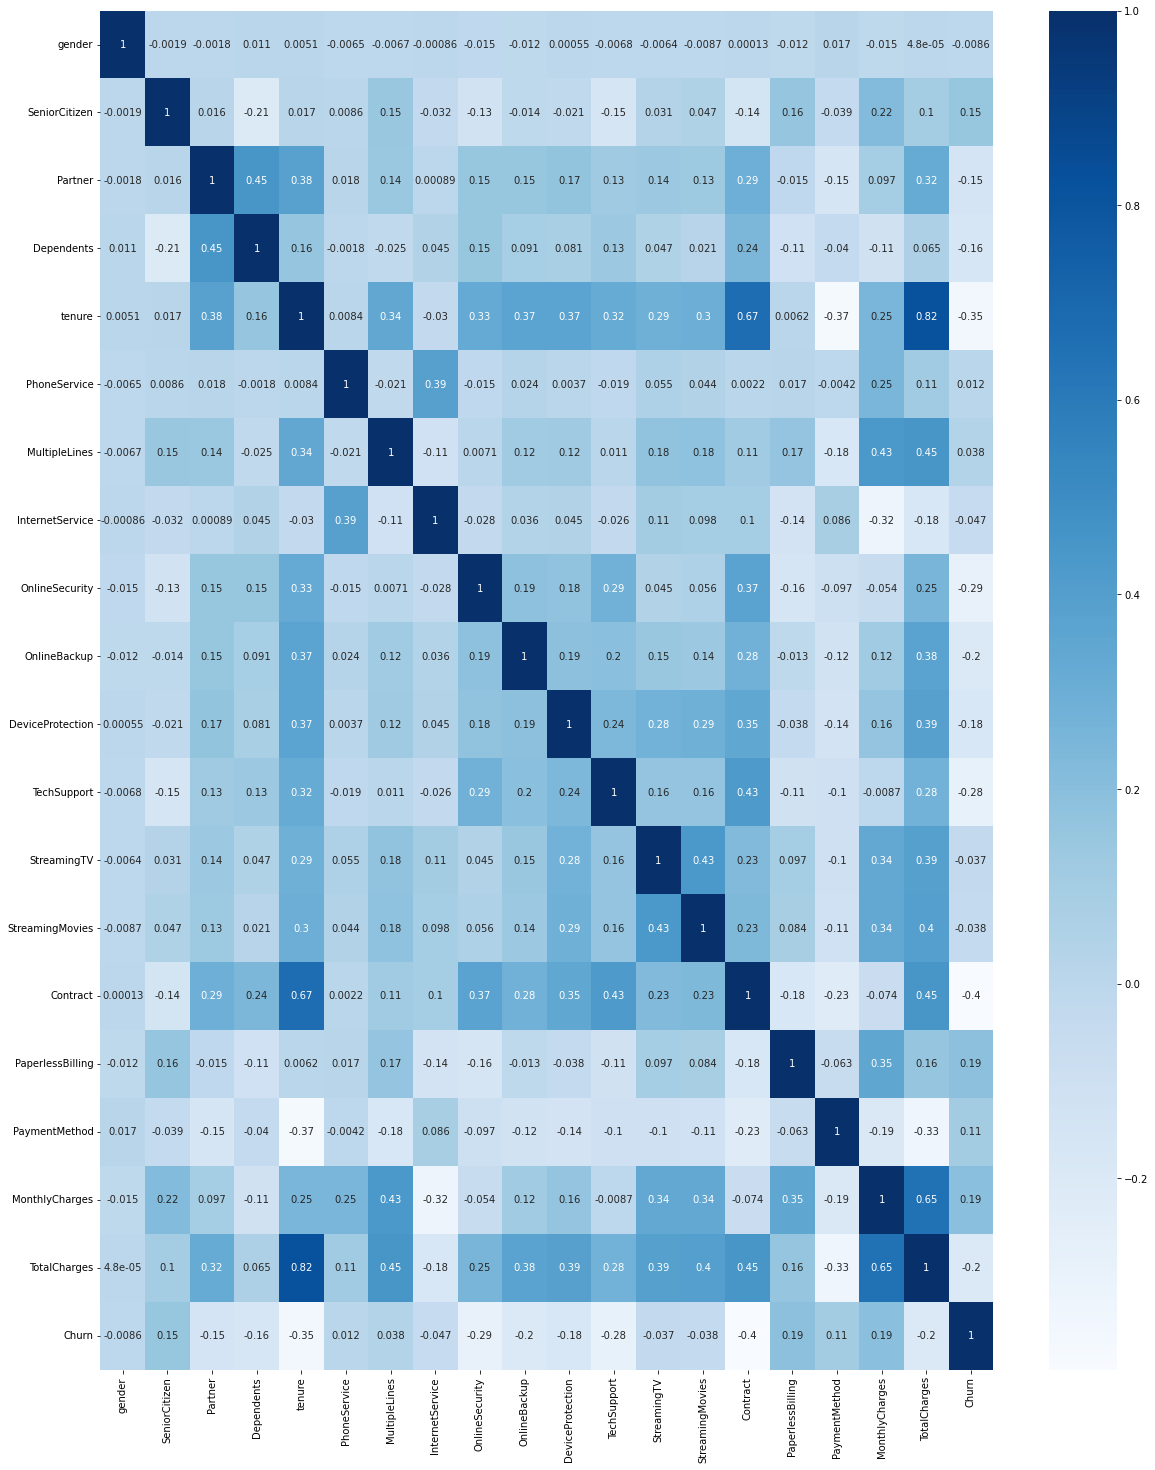

In [60]:
plt.figure(figsize=(20,25))  #plotting correlation using heatmap
sns.heatmap(corr,annot=True,cmap='Blues')

In [61]:
corr['Churn'].sort_values()  #sorting the correlation values of each column with target column

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

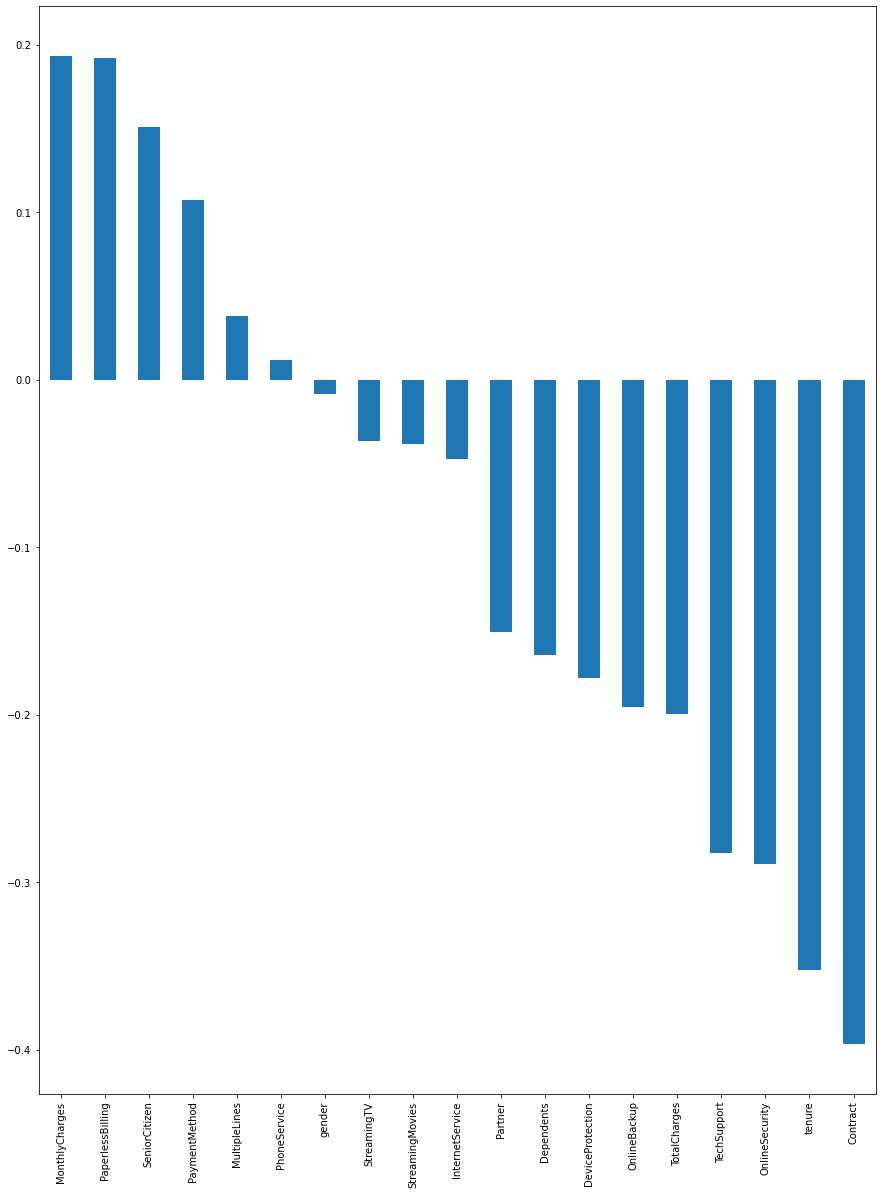

In [63]:
plt.figure(figsize=(15,20))
corr['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar')

### Plotting the outliers

gender                 AxesSubplot(0.125,0.749828;0.168478x0.130172)
SeniorCitizen       AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Partner             AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Dependents          AxesSubplot(0.731522,0.749828;0.168478x0.130172)
tenure                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
PhoneService        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
MultipleLines       AxesSubplot(0.529348,0.593621;0.168478x0.130172)
InternetService     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
OnlineSecurity         AxesSubplot(0.125,0.437414;0.168478x0.130172)
OnlineBackup        AxesSubplot(0.327174,0.437414;0.168478x0.130172)
DeviceProtection    AxesSubplot(0.529348,0.437414;0.168478x0.130172)
TechSupport         AxesSubplot(0.731522,0.437414;0.168478x0.130172)
StreamingTV            AxesSubplot(0.125,0.281207;0.168478x0.130172)
StreamingMovies     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Contract            AxesSubplot(0.

<Figure size 1440x1080 with 0 Axes>

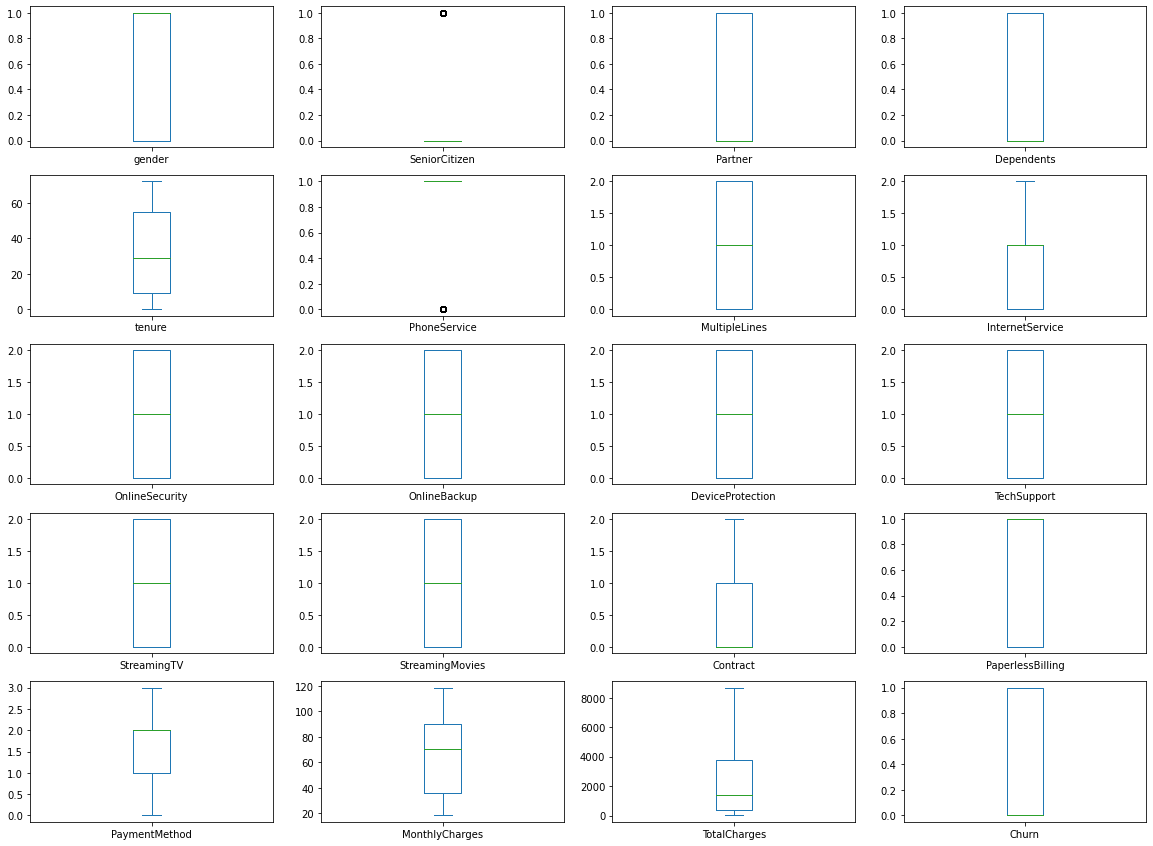

In [65]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(20,15))

### Checking the skewness

In [66]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

### Removing the outliers

In [68]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

(6361, 20)

### Model Building

In [69]:
#sepearting the dependent and independent varaibles
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [70]:
#scaling the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.99263832, -0.44159123, -0.97224479, ...,  1.33544287,
        -0.33661675, -0.2051956 ],
       [ 0.99263832, -0.44159123, -0.97224479, ...,  1.33544287,
        -0.43843231, -0.9707094 ],
       [-1.00741628, -0.44159123, -0.97224479, ...,  0.39969137,
         0.11498455, -0.9520158 ],
       ...,
       [-1.00741628, -0.44159123,  1.02854755, ..., -0.53606013,
         1.18240581,  2.1469324 ],
       [ 0.99263832,  2.26453771,  1.02854755, ...,  1.33544287,
         0.23650636, -0.8854279 ],
       [ 0.99263832, -0.44159123, -0.97224479, ..., -1.47181163,
         1.26287295,  1.92415622]])

In [71]:
#importing the different machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [72]:
#defining the models 

lg=LogisticRegression()
rdc=RandomForestClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

#### Finding the best random state

In [73]:
model=[lg,rdc,svc,dtc,knc]
maxAccu=0
bestRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best Accuracy score is', maxAccu , 'on random state', bestRS)

Best Accuracy score is 0.8308014667365112 on random state 41


In [74]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=41,test_size=.30)

#### Logisitic regression

In [80]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred1))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.8308014667365112
Confusion Matrix:  
 [[1289  120]
 [ 203  297]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1409
           1       0.57      0.52      0.55       500

    accuracy                           0.77      1909
   macro avg       0.71      0.69      0.70      1909
weighted avg       0.77      0.77      0.77      1909



#### Decision tree clasifier

In [81]:
dtc.fit(x_train,y_train)
pred2=dtc.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred2))
print('Classification Report: ','\n',classification_report(y_test,pred2))

Accuracy Score:  0.7469879518072289
Confusion Matrix:  
 [[1161  248]
 [ 235  265]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1409
           1       0.52      0.53      0.52       500

    accuracy                           0.75      1909
   macro avg       0.67      0.68      0.68      1909
weighted avg       0.75      0.75      0.75      1909



#### Support vector classifier

In [82]:
svc.fit(x_train,y_train)
pred3=svc.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred3))
print('Classification Report: ','\n',classification_report(y_test,pred3))

Accuracy Score:  0.8145625982189628
Confusion Matrix:  
 [[1302  107]
 [ 247  253]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1409
           1       0.70      0.51      0.59       500

    accuracy                           0.81      1909
   macro avg       0.77      0.72      0.73      1909
weighted avg       0.80      0.81      0.80      1909



#### Random forest classifier

In [83]:
rdc.fit(x_train,y_train)
pred4=rdc.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred4))
print('Classification Report: ','\n',classification_report(y_test,pred4))

Accuracy Score:  0.8203247773703509
Confusion Matrix:  
 [[1294  115]
 [ 228  272]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1409
           1       0.70      0.54      0.61       500

    accuracy                           0.82      1909
   macro avg       0.78      0.73      0.75      1909
weighted avg       0.81      0.82      0.81      1909



#### KNeighbor classifier

In [84]:
knc.fit(x_train,y_train)
pred5=knc.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred5))
print('Classification Report: ','\n',classification_report(y_test,pred5))

Accuracy Score:  0.7737035096909377
Confusion Matrix:  
 [[1215  194]
 [ 238  262]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1409
           1       0.57      0.52      0.55       500

    accuracy                           0.77      1909
   macro avg       0.71      0.69      0.70      1909
weighted avg       0.77      0.77      0.77      1909



#### Gaussian NB

In [88]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
pred6=nb.predict(x_test)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred6))
print('Classification Report: ','\n',classification_report(y_test,pred6))

Accuracy Score:  0.7737035096909377
Confusion Matrix:  
 [[1112  297]
 [ 117  383]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1409
           1       0.56      0.77      0.65       500

    accuracy                           0.78      1909
   macro avg       0.73      0.78      0.75      1909
weighted avg       0.82      0.78      0.79      1909



#### SGD classifier

In [89]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
pred7=nb.predict(x_test)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred7))
print('Classification Report: ','\n',classification_report(y_test,pred7))

Accuracy Score:  0.7737035096909377
Confusion Matrix:  
 [[1112  297]
 [ 117  383]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1409
           1       0.56      0.77      0.65       500

    accuracy                           0.78      1909
   macro avg       0.73      0.78      0.75      1909
weighted avg       0.82      0.78      0.79      1909



### Cross val score

In [90]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(lg,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  80.44332802552492
at cv=  4
cross val score =  80.53756586775455
at cv=  5
cross val score =  80.34891332809636
at cv=  6
cross val score =  80.50610851279498


### Hypermeter tuning

In [91]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'multi_class':['auto', 'ovr', 'multinomial']}

GCV=GridSearchCV(lg,param,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}

In [92]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8313253012048193

### AUC ROC Curve

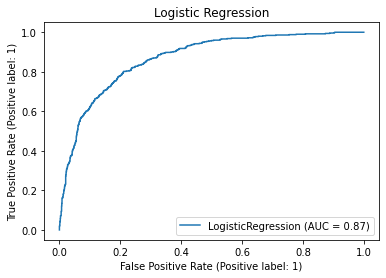

In [93]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('Logistic Regression')
plt.show()

Logistic regression has an accuracy of 87%

### Saving the model

In [94]:
import pickle
filename='customer_churn.pkl'
pickle.dump(lg, open(filename,'wb'))

### Conclusion

In [95]:
a=np.array(y_test)
pred=np.array(GCV_pred)
churn=pd.DataFrame({'Actual':a,'Predicted':pred})
churn

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
1904,0,1
1905,0,0
1906,0,1
1907,1,1
